# Charger les données

In [ ]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv("student_feedback.csv")

# Aperçu des premières lignes
print(df.head())


    id                                            comment sentiment
0  101              I didn’t learn much from this course.  negative
1  102           Everything was clear and easy to follow.  positive
2  103                     Not bad, but not great either.   neutral
3  104     The professor was not responsive to questions.  negative
4  105  I appreciated the detailed feedback on assignm...  positive


In [2]:
df.shape

(1900, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1900 non-null   int64 
 1   comment    1900 non-null   object
 2   sentiment  1900 non-null   object
dtypes: int64(1), object(2)
memory usage: 44.7+ KB


In [4]:
df.size

5700

In [5]:
df.describe(include='all')

,id,comment,sentiment
count,1900.000000,1900,1900
unique,NaN,281,3
top,NaN,Course materials were well-organized and helpful.,positive
freq,NaN,25,673
mean,1050.500000,NaN,NaN
std,548.627074,NaN,NaN
min,101.000000,NaN,NaN
25%,575.750000,NaN,NaN
50%,1050.500000,NaN,NaN
75%,1525.250000,NaN,NaN


In [6]:
df.columns

Index(['id', 'comment', 'sentiment'], dtype='object')

In [7]:
print("\nValeurs manquantes:\n", df.isnull().sum())


Valeurs manquantes:
 id           0
comment      0
sentiment    0
dtype: int64


In [8]:
df.dtypes

id            int64
comment      object
sentiment    object
dtype: object

In [9]:
df.tail()

,id,comment,sentiment
1895,1996,Not much stood out to me in this course.,neutral
1896,1997,This class sparked my interest in the subject.,positive
1897,1998,Instructions for tasks were often confusing.,negative
1898,1999,Instructor's feedback was unclear and inconsis...,negative
1899,2000,It was neither too easy nor too hard.,neutral


# Nettoyer les textes (prétraitement NLP)

In [11]:
import string

def clean_text(text):
    text = text.lower()  # mettre en minuscule
    text = ''.join([char for char in text if char not in string.punctuation])  # supprimer la ponctuation
    return text

# Appliquer la fonction de nettoyage
df['cleaned'] = df['comment'].apply(clean_text)

#  Séparer les variables (features/target)

In [12]:
X = df['cleaned']       # Texte nettoyé
y = df['sentiment']     # Étiquette à prédire

# Diviser les données en entraînement/test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le pipeline NLP + Logistic Regression

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import nltk

# Télécharger les stopwords anglais
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Pipeline complet
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),     # NLP
    ('clf', LogisticRegression(max_iter=1000))              # Modèle ML
])

[nltk_data] Downloading package stopwords to C:\Users\WIJDANE
[nltk_data]     TAFTAF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Entraîner le modèle

In [15]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...])),
                ('clf', LogisticRegression(max_iter=1000))])

# Évaluer le modèle

In [16]:
from sklearn.metrics import classification_report

# Prédictions
y_pred = pipeline.predict(X_test)

# Rapport d'évaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       117
     neutral       1.00      0.99      1.00       128
    positive       0.99      0.99      0.99       135

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380



<Figure size 600x600 with 0 Axes>

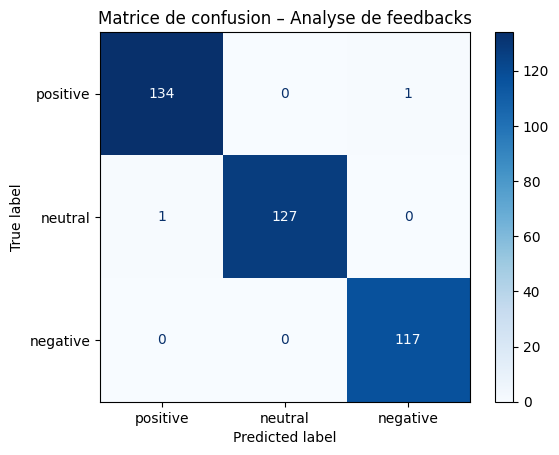

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

# Afficher la matrice avec des labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['positive', 'neutral', 'negative'])

# Tracer la matrice
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matrice de confusion – Analyse de feedbacks")
plt.show()


# Sauvegarder le modèle entraîné

In [17]:
import joblib

joblib.dump(pipeline, 'nlp_logistic_sentiment_model.pkl')

['nlp_logistic_sentiment_model.pkl']

In [1]:
import joblib

# Charger le modèle NLP + Logistic Regression
model = joblib.load('nlp_logistic_sentiment_model.pkl')
# Exemple de commentaires à tester
new_feedbacks = [
    "This course was amazing and very helpful.",
    "I didn't understand anything, it was confusing.",
    "It was okay, not too good, not too bad."
]

# Prédictions
predictions = model.predict(new_feedbacks)

# Affichage des résultats
for comment, sentiment in zip(new_feedbacks, predictions):
    print(f"> \"{comment}\" → Sentiment : {sentiment}")


> "This course was amazing and very helpful." → Sentiment : positive
> "I didn't understand anything, it was confusing." → Sentiment : negative
> "It was okay, not too good, not too bad." → Sentiment : neutral
